## **Assignment 2**

Name: Preeti Jagdish Sajjan          
StudentID: 19232625  

### **Section 1: Data Collection and Preprocessing**

####**Task 1:** ####
Downloaded a language pair of English-French combination.

In [0]:
# Reading the file fra.txt and dropping the column 'copyright' and assigning the first 10000 entries in the dataset.

import pandas as pd
dataset=pd.read_csv("/content/drive/My Drive/NLPAssignment/fra.txt", delimiter="\t", names = ["English", "French", "Copyright"])
dataset = dataset.drop(["Copyright"], axis=1)
lines= dataset.values.tolist()
print("Number of sentences: ",len(lines))
lines= lines[0:10000]
print("100th sentence in original script for source and target language: \n", lines[100])

Number of sentences:  175623
100th sentence in original script for source and target language: 
 ['Come in.', 'Entre.']


####**Task 2:**####
1. Preprocess the texts.
2. Denote each sentence in target with start and end of it.
3. Split the data into training and testing.


In [0]:
import re
import string
from unicodedata import normalize

# SOURCE: https://nextjournal.com/gkoehler/machine-translation-seq2seq-cpu

def preprocess(lines):
  preprolist = list()
  # prepare regex for char filtering
  re_print = re.compile('[^%s]' % re.escape(string.printable))
  # prepare translation table for removing punctuation
  table = str.maketrans('', '', string.punctuation)
    
  for pair in lines:
    prepro_list = list()
    for line in pair:
      # removing white spaces
      line = line.split()
      # convert to lowercase
      line = [word.lower() for word in line]
      # removing punctuation from each token
      line = [word.translate(table) for word in line]
      prepro_list.append(' '.join(line))
    preprolist.append(prepro_list)
  return(preprolist)

processed_pair = preprocess(lines)
print(processed_pair)

[['go', 'va '], ['hi', 'salut '], ['hi', 'salut'], ['run', 'cours '], ['run', 'courez '], ['who', 'qui '], ['wow', 'ça alors '], ['fire', 'au feu '], ['help', 'à laide '], ['jump', 'saute'], ['stop', 'ça suffit '], ['stop', 'stop '], ['stop', 'arrêtetoi '], ['wait', 'attends '], ['wait', 'attendez '], ['go on', 'poursuis'], ['go on', 'continuez'], ['go on', 'poursuivez'], ['hello', 'bonjour '], ['hello', 'salut '], ['i see', 'je comprends'], ['i try', 'jessaye'], ['i won', 'jai gagné '], ['i won', 'je lai emporté '], ['i won', 'j’ai gagné'], ['oh no', 'oh non '], ['attack', 'attaque '], ['attack', 'attaquez '], ['cheers', 'santé '], ['cheers', 'à votre santé '], ['cheers', 'merci '], ['cheers', 'tchintchin '], ['get up', 'lèvetoi'], ['go now', 'va maintenant'], ['go now', 'allezy maintenant'], ['go now', 'vasy maintenant'], ['got it', 'jai pigé '], ['got it', 'compris '], ['got it', 'pigé '], ['got it', 'compris '], ['got it', 'tas capté '], ['hop in', 'monte'], ['hop in', 'montez'], [

In [0]:
X  = [x[0] for x in processed_pair]
# add both start and end tokens to denote the end
#of the sentence to the each target line.
Y  = ['START_ ' + x[1] + ' _END'for x in processed_pair]
print(X)
print(Y)


['go', 'hi', 'hi', 'run', 'run', 'who', 'wow', 'fire', 'help', 'jump', 'stop', 'stop', 'stop', 'wait', 'wait', 'go on', 'go on', 'go on', 'hello', 'hello', 'i see', 'i try', 'i won', 'i won', 'i won', 'oh no', 'attack', 'attack', 'cheers', 'cheers', 'cheers', 'cheers', 'get up', 'go now', 'go now', 'go now', 'got it', 'got it', 'got it', 'got it', 'got it', 'hop in', 'hop in', 'hug me', 'hug me', 'i fell', 'i fell', 'i know', 'i left', 'i left', 'i lied', 'i lost', 'i paid', 'im 19', 'im ok', 'im ok', 'listen', 'no way', 'no way', 'no way', 'no way', 'no way', 'no way', 'no way', 'no way', 'no way', 'really', 'really', 'really', 'thanks', 'we try', 'we won', 'we won', 'we won', 'we won', 'ask tom', 'awesome', 'be calm', 'be calm', 'be calm', 'be cool', 'be fair', 'be fair', 'be fair', 'be fair', 'be fair', 'be fair', 'be kind', 'be nice', 'be nice', 'be nice', 'be nice', 'be nice', 'be nice', 'beat it', 'call me', 'call me', 'call us', 'call us', 'come in', 'come in', 'come in', 'come 

In [0]:
X_data  = [x.split() for x in X]
Y_data  = [x.split() for x in Y]
print(X_data)
print(Y_data)

# split into train an test.
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X_data, Y_data, train_size = 2/3, shuffle = True)  #french to english

#Xtrain,Xtest,Ytrain,Ytest = My_train_test_split(X,Y,0.7, 0.3)

[['go'], ['hi'], ['hi'], ['run'], ['run'], ['who'], ['wow'], ['fire'], ['help'], ['jump'], ['stop'], ['stop'], ['stop'], ['wait'], ['wait'], ['go', 'on'], ['go', 'on'], ['go', 'on'], ['hello'], ['hello'], ['i', 'see'], ['i', 'try'], ['i', 'won'], ['i', 'won'], ['i', 'won'], ['oh', 'no'], ['attack'], ['attack'], ['cheers'], ['cheers'], ['cheers'], ['cheers'], ['get', 'up'], ['go', 'now'], ['go', 'now'], ['go', 'now'], ['got', 'it'], ['got', 'it'], ['got', 'it'], ['got', 'it'], ['got', 'it'], ['hop', 'in'], ['hop', 'in'], ['hug', 'me'], ['hug', 'me'], ['i', 'fell'], ['i', 'fell'], ['i', 'know'], ['i', 'left'], ['i', 'left'], ['i', 'lied'], ['i', 'lost'], ['i', 'paid'], ['im', '19'], ['im', 'ok'], ['im', 'ok'], ['listen'], ['no', 'way'], ['no', 'way'], ['no', 'way'], ['no', 'way'], ['no', 'way'], ['no', 'way'], ['no', 'way'], ['no', 'way'], ['no', 'way'], ['really'], ['really'], ['really'], ['thanks'], ['we', 'try'], ['we', 'won'], ['we', 'won'], ['we', 'won'], ['we', 'won'], ['ask', 'tom

In [0]:
# set of english words 
total_eng_words  = set([item for sublist in X_data for item in sublist])
# set of french words 
total_fre_words = set([item for sublist in Y_data for item in sublist])

# maximum length of english sentence
eng_sentence_length = max([len(sample.split()) for sample in X])
# maximum length of french  sentence
fre_sentence_length = max([len(sample.split()) for sample in Y])

input_words = sorted(list(total_eng_words))
target_words = sorted(list(total_fre_words))
num_encoder_tokens = len(total_eng_words)
num_decoder_tokens = len(total_fre_words)

In [0]:
print('Number of samples:', len(X_data))
print('Number of unique source language tokens:', len(total_eng_words))
print('Number of unique target language tokens:', len(total_fre_words))
print('Max sequence length of source language:', eng_sentence_length)
print('Max sequence length of target language:', fre_sentence_length)
print("Source Vocabulary",total_eng_words)
print("Target Vocabulary",total_fre_words)

Number of samples: 10000
Number of unique source language tokens: 2142
Number of unique target language tokens: 4551
Max sequence length of source language: 5
Max sequence length of target language: 12
Source Vocabulary {'grew', 'japanese', 'barefoot', 'talks', 'safe', 'skate', 'put', 'drop', 'more', 'earlier', 'frowning', 'guess', 'bitter', 'were', 'frank', 'nailed', 'plants', 'likely', 'cheap', 'juggle', 'tomorrow', 'will', 'prepare', 'prison', 'bark', 'sickens', 'blushed', 'thats', 'eyes', 'committed', 'sit', 'liar', 'author', 'sincere', 'prove', 'true', 'surrender', 'being', 'sued', 'sick', 'amazing', 'marry', 'job', 'stop', 'amusing', 'merchant', 'timing', 'thrilling', 'dependable', 'life', 'shout', 'shaken', 'silly', 'eighteen', 'come', 'advice', 'car', 'form', 'object', 'steal', 'did', 'thin', 'stubborn', 'mom', 'restless', 'predicted', 'aint', 'started', 'flip', 'shoot', 'sugar', 'powerful', 'ignored', 'hole', 'inside', 'another', 'small', 'judge', 'resisting', 'noticed', 'pain

####**Task 3:**####
1. Assigning each unique word an integer value
2. Create word embedding for the vocabulary using pre-trained Glove embeddings

In [0]:
import numpy as np
input_token_index = dict(
    [(word, i) for i, word in enumerate(input_words)])
target_token_index = dict(
    [(word, i) for i, word in enumerate(target_words)])


In [0]:
# load the Glove file create an index for each word in
# embedding file that represents the embeding vector  
import numpy as np
embeddings_index = dict()
f = open('/content/drive/My Drive/NLPAssignment/glove.6B.100d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [0]:
# create an embedding vector for each value in our unique
# source language.
MAX_NUM_WORDS = num_encoder_tokens - 1
EMBEDDING_DIM = 100
num_words = min(MAX_NUM_WORDS, len(total_eng_words)) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for i, word in enumerate(list(total_eng_words)):
    if i > MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word) ## This references the loaded embeddings dictionary
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [0]:
print("First line of embedding: \n", embedding_matrix[0])

First line of embedding: 
 [ 0.83284998  0.39534     0.14172    -0.44119999  0.27331999 -0.30450001
 -0.046437   -0.13668001  0.40950999  0.00344    -0.43921    -0.50414997
 -0.024748   -0.013304    0.61655003 -0.89003998 -0.27583     0.32427999
 -0.20246001  0.20190001  0.37975001  0.89008999  0.56037998  0.39283001
 -0.01053    -0.45346999 -0.11976    -0.60693002  0.010475    0.42447999
 -0.0073245   0.45535001  0.65967    -0.47566     0.12601     0.51784998
  0.66382998 -0.046662    0.19236     0.073075   -0.41769999 -0.82113999
 -0.20830999 -0.18065     0.37461999 -0.53544998  0.86763     0.28823999
  1.1595     -1.00730002 -0.20599    -0.9267      0.32240999  0.73611999
 -0.26036999 -2.01049995 -0.75410002 -0.53218001  0.40781999  0.67184001
  0.75971001  0.71547002 -0.36215001 -0.63628    -0.15036    -0.022832
  0.25663999 -0.33552     1.31369996  0.72180003  0.48210999  0.19487
 -0.66798002  0.11196    -0.075276    0.21433    -0.023462    0.053653
 -0.47376001  0.099731    0.099

###**Section 2: Translation Model training**###
####**Task 4:**####
1. Provide code for encoder using Keras LSTM
2. Provide code for decoder using Keras LSTM
3. Train the sequence2sequence model

In [0]:
# placeholders training data to feed to model
encoder_input_data = np.zeros((len(Xtrain), eng_sentence_length), dtype='float32')
decoder_input_data = np.zeros((len(Ytrain), fre_sentence_length), dtype='float32')
decoder_target_data = np.zeros((len(Ytrain), fre_sentence_length, num_decoder_tokens), dtype='float32')

# populate above created placeholders with unique integer values for every word
for i, (input_text, target_text) in enumerate(zip(Xtrain, Ytrain)):
    for t, word in enumerate(input_text):
        encoder_input_data[i, t] = input_token_index[word]
    for t, word in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data[i, t] = target_token_index[word]
        if t > 0:
            # hence decoder_target_data will not include the start character.
            decoder_target_data[i, t - 1, target_token_index[word]] = 1.


In [0]:
from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model
#from keras.utils import plot_model
# SOURCE: https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html
# SOURCE: https://stackabuse.com/python-for-nlp-neural-machine-translation-with-seq2seq-in-keras/

embedding_dim = 100
embedding_size = 100
encoder_inputs = Input(shape=(None,))
encoder_embedding = Embedding(num_encoder_tokens, embedding_dim, weights= [embedding_matrix], trainable=False)(encoder_inputs)
encoder = LSTM(256, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_embedding)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

decoder_inputs = Input(shape=(None,))
decoder_embedding =  Embedding(num_decoder_tokens, embedding_size)
final_emb= decoder_embedding(decoder_inputs)

decoder_lstm = LSTM(256, return_sequences=True, return_state=True)
decoder_outputs, h, c = decoder_lstm(final_emb, initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

model = Model(inputs=[encoder_inputs, decoder_inputs], outputs=decoder_outputs)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 100)    214200      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 100)    455100      input_2[0][0]                    
____________________________________________________________________________________________

In [0]:
model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=64,
          epochs=100,
          validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 5332 samples, validate on 1334 samples
Epoch 1/100
5332/5332 [==============================] - 32s 6ms/step - loss: 1.8526 - accuracy: 0.0990 - val_loss: 1.7133 - val_accuracy: 0.1091
Epoch 2/100
5332/5332 [==============================] - 31s 6ms/step - loss: 1.5623 - accuracy: 0.1171 - val_loss: 1.5750 - val_accuracy: 0.1284
Epoch 3/100
5332/5332 [==============================] - 31s 6ms/step - loss: 1.4070 - accuracy: 0.1336 - val_loss: 1.4825 - val_accuracy: 0.1434
Epoch 4/100
5332/5332 [==============================] - 31s 6ms/step - loss: 1.2906 - accuracy: 0.1465 - val_loss: 1.4240 - val_accuracy: 0.1482
Epoch 5/100
5332/5332 [==============================] - 31s 6ms/step - loss: 1.2000 - accuracy: 0.1560 - val_loss: 1.3488 - val_accuracy: 0.1593
Epoch 6/100
5332/5332 [==============================] - 31s 6ms/step - loss: 1.1243 - accuracy: 0.1644 - val_loss: 1.3131 - va

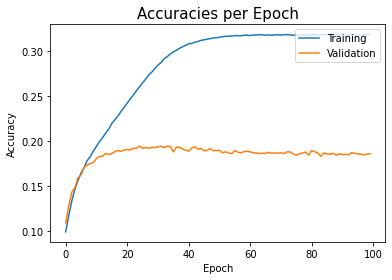

In [0]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Accuracies per Epoch', size=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

###**Section 3: Testing**###
####**Task 5:**####


1.   Using the trained model to translate text from source language to target language
2.   Performing automatic evaluation with the BLEU metric.



In [0]:
# Next: inference mode
# 1) encode input and retrieve initial decoder state
# 2) run one step of decoder with this initial state
# and a "start of sequence" token as target.
# Output will be the next target token
# 3) Repeat with the current target token and current states

encoder_model = Model(encoder_inputs, encoder_states)
decoder_state_input_h = Input(shape=(256,))
decoder_state_input_c = Input(shape=(256,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

final_embed= decoder_embedding(decoder_inputs)

decoder_outputs2, state_h2, state_c2 = decoder_lstm(final_embed, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2)
decoder_model = Model([decoder_inputs] + decoder_states_inputs,
                      [decoder_outputs2] + decoder_states2)


In [0]:
# Reverse-lookup token index to decode sequences back to something readable.
reverse_input_char_index = dict((i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict((i, char) for char, i in target_token_index.items())

def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = target_token_index['START_']

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
   
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token        
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += ' '+sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '_END' or
           len(decoded_sentence) > 52):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]
        
    return decoded_sentence

In [0]:
# Create placeholder variables for our test embeddings
encoder_input_data_test = np.zeros((len(Xtest), eng_sentence_length), dtype='float32')
decoder_input_data_test = np.zeros((len(Ytest), fre_sentence_length), dtype='float32')
decoder_target_data_test = np.zeros((len(Ytest), fre_sentence_length, num_decoder_tokens), dtype='float32')

# populate the test place holders
for i, (input_text, target_text) in enumerate(zip(Xtest, Ytest)):
    for t, word in enumerate(input_text):
        encoder_input_data_test[i, t] = input_token_index[word]
    for t, word in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data_test[i, t] = target_token_index[word]
        if t > 0:
            # hence, decoder_target_data will not include the start character.
            decoder_target_data_test[i, t - 1, target_token_index[word]] = 1.

In [0]:
from nltk.translate.bleu_score import sentence_bleu

# using the sentence_bleu score from nltk
# find the average Bleu score for the entire test set.
bleu_score = []
j = 0
for i in range(len(Ytest)):
  input_seq = encoder_input_data_test[i: i + 1]
  output_sentence = decode_sequence(input_seq)
  #output_sentence
  expected = Ytest[i][1:-1]
  output_sentence = output_sentence.split()
  del output_sentence[-1]
  bleu_score.append(sentence_bleu([expected],output_sentence,weights=(0.25, 0.25, 0.25, 0.25)))
  if j <=10:
    if j == 0:
      print("\nSome of the predictions:")
    print("\nInput Sequence: ", Xtest[j])
    print("Output Sequence: ", output_sentence)
    print("Expected Sequence: ", expected)
    j += 1

print('\nAverage BLEU Score is: ' + str(np.mean(bleu_score)))

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)



Some of the predictions:

Input Sequence:  ['i', 'loved', 'that']
Output Sequence:  ['jai', 'eu', 'du', 'ça']
Expected Sequence:  ['jai', 'adoré', 'ça']

Input Sequence:  ['is', 'this', 'wine']
Output Sequence:  ['sagitil', 'de', 'vin']
Expected Sequence:  ['estce', 'du', 'vin']

Input Sequence:  ['im', 'not', 'dumb']
Output Sequence:  ['je', 'ne', 'suis', 'pas', 'fou']
Expected Sequence:  ['je', 'ne', 'suis', 'pas', 'abruti']

Input Sequence:  ['things', 'break']
Output Sequence:  ['arrêtez', 'à', 'moi']
Expected Sequence:  ['les', 'choses', 'se', 'cassent']

Input Sequence:  ['whos', 'driving']
Output Sequence:  ['qui', 'est', 'là']
Expected Sequence:  ['qui', 'est', 'au', 'volant']

Input Sequence:  ['please', 'stop']
Output Sequence:  ['arrête', 'sil', 'te', 'plaît']
Expected Sequence:  ['merci', 'darrêter']

Input Sequence:  ['i', 'need', 'my', 'key']
Output Sequence:  ['il', 'me', 'faut', 'partir']
Expected Sequence:  ['jai', 'besoin', 'de', 'ma', 'clé']

Input Sequence:  ['be',

###**Section 4: Model with Attention**###
####**Task 6:**####


1.   Create sequence2sequence model with attention.
2.   Train the model.
3.   Translate the evaluation set using seq2seq attention model.
2.   Evaluate the model against the model without attention using BLEU.


In [0]:
from keras.layers import SimpleRNN
from keras.layers import Activation, dot, concatenate
from keras.layers import Input, Embedding, LSTM, TimeDistributed, Dense, Bidirectional

embedding_size = 100
encoder_input = Input(shape=(eng_sentence_length,))
encoder = Embedding(num_encoder_tokens, embedding_size, weights= [embedding_matrix], trainable=False)(encoder_input)
encoder = LSTM(256, return_sequences=True, unroll=True)(encoder)
encoder_last = encoder[:,-1,:]  # all the rows of entries with last row and all columns

decoder_input = Input(shape=(fre_sentence_length,))
decoder = Embedding(num_decoder_tokens, embedding_size)(decoder_input)
decoder = LSTM(256, return_sequences=True, unroll=True)(decoder, initial_state=[encoder_last, encoder_last])

# Local Attention can only be considered for small dataset
# Global Attention with Dot-based scoring function
# SOURCE: https://towardsdatascience.com/attention-based-neural-machine-translation-b5d129742e2c 

attention = dot([decoder, encoder], axes=[2, 2])
attention = Activation('sigmoid', name='attention')(attention)

product = dot([attention, encoder], axes=[2,1])

decoder_context = concatenate([product, decoder])

output = TimeDistributed(Dense(256, activation="relu"))(decoder_context)
output = TimeDistributed(Dense(num_decoder_tokens, activation="softmax"))(output)

attention_model = Model(inputs =[encoder_input, decoder_input], outputs =[output])
attention_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
attention_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 12)           0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            (None, 5)            0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 12, 100)      455100      input_8[0][0]                    
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 5, 100)       214200      input_7[0][0]                    
____________________________________________________________________________________________

In [0]:
attention_model.fit([encoder_input_data, decoder_input_data],
          [decoder_target_data] , batch_size=64,
          epochs=100, validation_split=0.2)

Train on 5332 samples, validate on 1334 samples
Epoch 1/100
5332/5332 [==============================] - 33s 6ms/step - loss: 1.8585 - accuracy: 0.1020 - val_loss: 1.6658 - val_accuracy: 0.1193
Epoch 2/100
5332/5332 [==============================] - 31s 6ms/step - loss: 1.4393 - accuracy: 0.1330 - val_loss: 1.4568 - val_accuracy: 0.1414
Epoch 3/100
5332/5332 [==============================] - 31s 6ms/step - loss: 1.2171 - accuracy: 0.1492 - val_loss: 1.3808 - val_accuracy: 0.1505
Epoch 4/100
5332/5332 [==============================] - 31s 6ms/step - loss: 1.0438 - accuracy: 0.1606 - val_loss: 1.3032 - val_accuracy: 0.1616
Epoch 5/100
5332/5332 [==============================] - 32s 6ms/step - loss: 0.8863 - accuracy: 0.1730 - val_loss: 1.2937 - val_accuracy: 0.1693
Epoch 6/100
5332/5332 [==============================] - 31s 6ms/step - loss: 0.7401 - accuracy: 0.1893 - val_loss: 1.2860 - val_accuracy: 0.1764
Epoch 7/100
5332/5332 [==============================] - 31s 6ms/step - loss

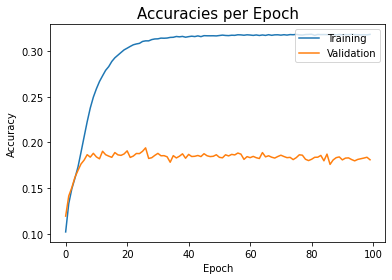

In [0]:
import matplotlib.pyplot as plt

plt.plot(attention_model.history.history['accuracy'])
plt.plot(attention_model.history.history['val_accuracy'])
plt.title('Accuracies per Epoch', size=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [0]:
def encode(text):
  decoder_input = np.zeros(shape=(eng_sentence_length, fre_sentence_length))
  decoder_input[:,0] = target_token_index['START_']
  for i in range(1, fre_sentence_length):
    output = attention_model.predict([text, decoder_input]).argmax(axis=2)
    decoder_input[:,i] = output[:,i]
  return decoder_input[:,1:]

def decode(sequence):
  # decode an encoded vector using the reverse dictionary
  # created earlier.
  text = ''
  for i in sequence:
    if reverse_target_char_index[i] == '_END':
      break
    else:
      text += ' ' + reverse_target_char_index[i]
  return text

def translate(text):
  # tranalate a given encoded vector into a target langauage
  decoder_output = encode(text)
  return decode(decoder_output[0]).split()

#Smooth = SmoothingFunction().method2
bleu_score = []
j=0
for i in range(len(Ytest)):
  # using the sentence_bleu score from nltk
  # find the average smoothend Bleu score for the entire test set.
  input_seq = encoder_input_data_test[i: i + 1]
  output_sentence = translate(input_seq)
  expected = Ytest[i][1:-1]
  bleu_score.append(sentence_bleu([expected],output_sentence ,weights=(0.25, 0.25, 0.25, 0.25))) # cummulative n-gram BLEU

  if j <=10:
    if j == 0:
      print("\nSome of the predictions:")
    print("\nInput Sequence: ", Xtest[j])
    print("Output Sequence: ", output_sentence)
    print("Expected Sequence: ", expected)
    j += 1

print('Average BLEU Score is: ' + str(np.mean(bleu_score)))


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)



Some of the predictions:

Input Sequence:  ['i', 'loved', 'that']
Output Sequence:  ['ça']
Expected Sequence:  ['jai', 'adoré', 'ça']

Input Sequence:  ['is', 'this', 'wine']
Output Sequence:  ['de', 'sagitil']
Expected Sequence:  ['estce', 'du', 'vin']

Input Sequence:  ['im', 'not', 'dumb']
Output Sequence:  ['ne', 'pas', 'fou']
Expected Sequence:  ['je', 'ne', 'suis', 'pas', 'abruti']

Input Sequence:  ['things', 'break']
Output Sequence:  ['plus', 'qui', 'jouer', 'toi']
Expected Sequence:  ['les', 'choses', 'se', 'cassent']

Input Sequence:  ['whos', 'driving']
Output Sequence:  ['qui', 'estil', 'moi']
Expected Sequence:  ['qui', 'est', 'au', 'volant']

Input Sequence:  ['please', 'stop']
Output Sequence:  ['sil', 'plaît', 'vous', 'disputer', 'vous', '»', 'vous', '»']
Expected Sequence:  ['merci', 'darrêter']

Input Sequence:  ['i', 'need', 'my', 'key']
Output Sequence:  ['jai', 'besoin', 'dargent', 'du']
Expected Sequence:  ['jai', 'besoin', 'de', 'ma', 'clé']

Input Sequence:  [

/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)



Input Sequence:  ['slow', 'down']
Output Sequence:  ['ralentis']
Expected Sequence:  ['ralentissez']

Input Sequence:  ['is', 'tom', 'ill']
Output Sequence:  ['tom', 'le']
Expected Sequence:  ['tom', 'estil', 'malade']


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


Average BLEU Score is: 0.3254233992520542


Conclusion, model developed without Attention is achieveing an accuracy of around 53.4% and model developed with global attention is achieveing an accuracy of around 32.5%. The above evaluation of the models are using BLEU score.